In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score

In [3]:
df = pd.read_csv('clean.csv')

In [91]:
weight = sum(df['target'] == 0) / df.shape[0]
df['sample_weight'] = df['target'].apply(lambda x: weight if x == 1 else 1 - weight)
sample = df.sample(n=50000, random_state=0, weights='sample_weight', axis=0)

In [98]:
targets = sample['target']

In [114]:
l = list(sample.columns.values)
l.remove('target')
l.remove('sample_weight')

In [115]:
features = sample[l]

In [117]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=0)

In [118]:
tree = DecisionTreeClassifier(random_state=0)

In [154]:
# Specify params to cycle through
CRITERION = ["gini", "entropy"]
MAX_DEPTH = [5, 6, 7, 8, 9, 10]
MIN_SAMPLES_SPLIT = [50, 100, 200, 500]
param_grid = {
    'criterion': CRITERION,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT
}
scoring = ["accuracy", "precision", "recall"]
grid = GridSearchCV(tree, param_grid=param_grid, cv=10, scoring=scoring, refit="accuracy")

In [155]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
        

In [156]:
results = pd.DataFrame.from_dict(grid.cv_results_)

In [157]:
filtered_results = results[['param_criterion',
                            'param_max_depth',
                            'param_min_samples_split',
                            'mean_test_accuracy',
                            'mean_test_precision',
                            'mean_test_recall'
                           ]]

In [158]:
filtered_results

,param_criterion,param_max_depth,param_min_samples_split,mean_test_accuracy,mean_test_precision,mean_test_recall
0,gini,5,50,0.581413,0.566837,0.765920
1,gini,5,100,0.581573,0.566985,0.765816
2,gini,5,200,0.581547,0.566963,0.765816
3,gini,5,500,0.581787,0.567171,0.765711
4,gini,6,50,0.584667,0.568878,0.769569
5,gini,6,100,0.584960,0.569152,0.769360
6,gini,6,200,0.585360,0.569440,0.769830
7,gini,6,500,0.585973,0.569889,0.770353
8,gini,7,50,0.586773,0.574122,0.737740
9,gini,7,100,0.587013,0.574444,0.736643


In [159]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

In [160]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

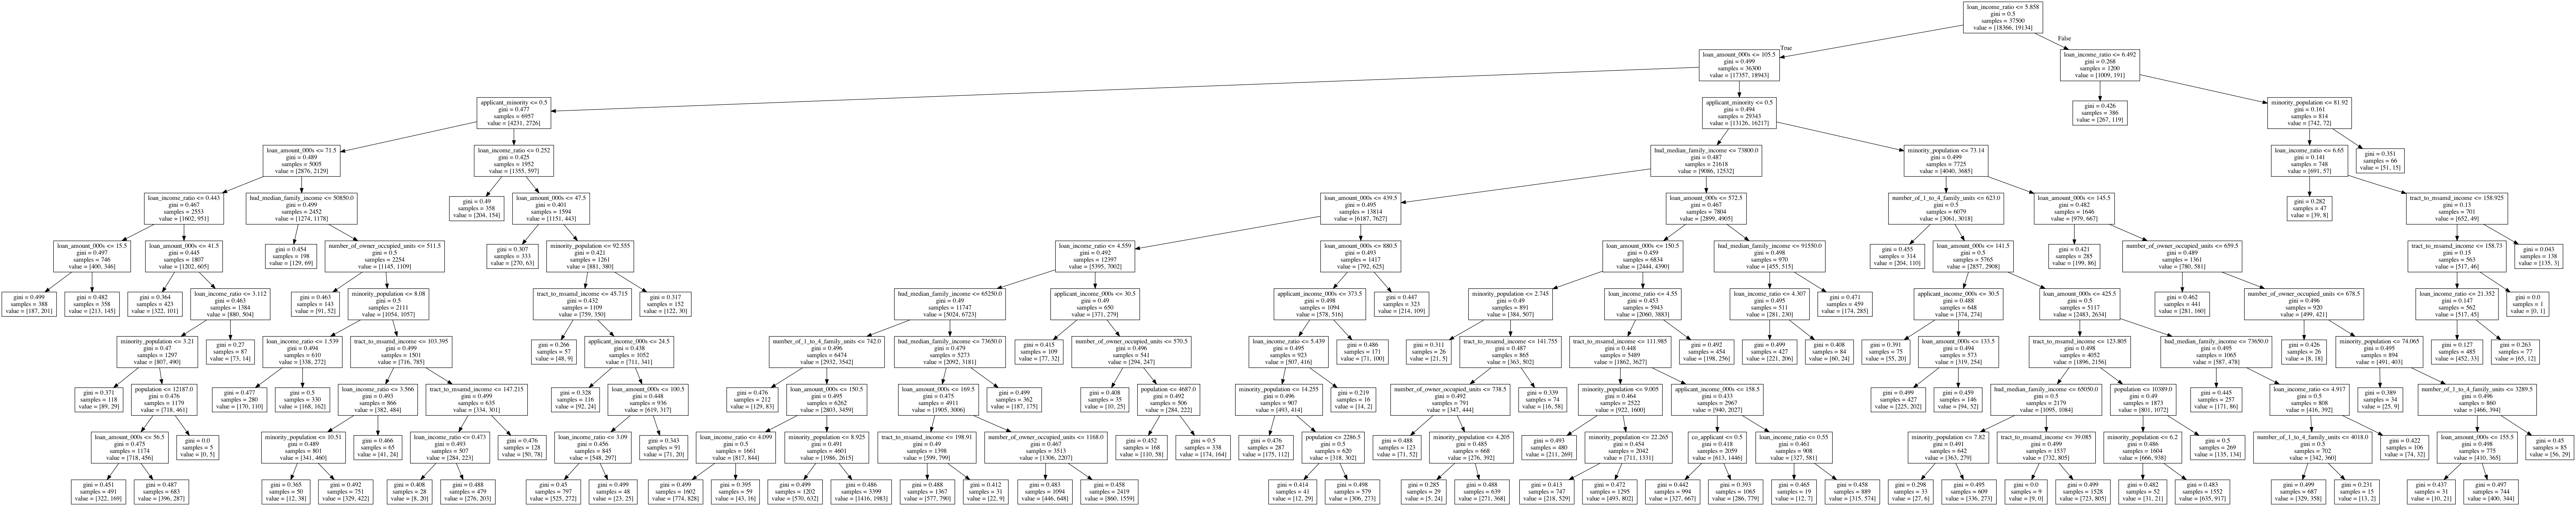

In [161]:
dot_data = export_graphviz(grid.best_estimator_, out_file=None, feature_names=l)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [162]:
from sklearn.metrics import plot_confusion_matrix

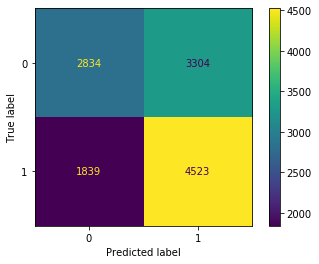

In [163]:
plot_confusion_matrix(grid.best_estimator_, x_test, y_test, values_format='d')